In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.shape

(404290, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
#missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
#duplicate values(This finds duplicate rows)
df.duplicated().sum()

0

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


<Axes: >

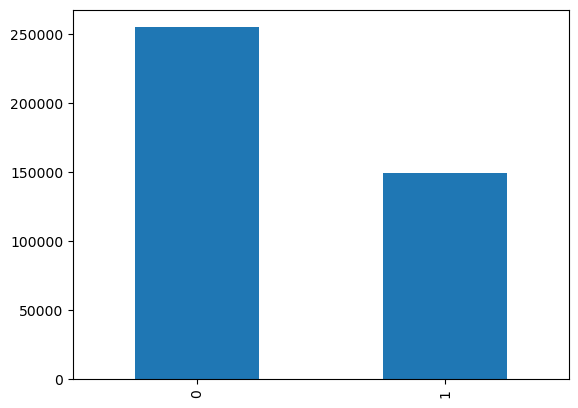

In [8]:
#Distribution of dupllicate and non-duplicate questions
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [9]:
#Repeated Questions
qid=pd.Series(df['qid1'].to_list()+df['qid2'].to_list())
print('Number of unique questions',np.unique(qid).shape[0])
x=qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


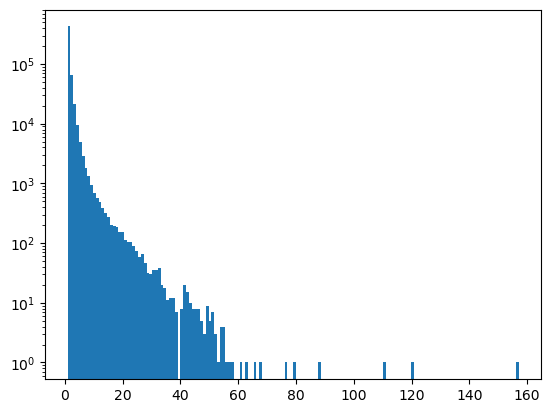

In [10]:
#Repeated questions histogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [11]:
df.shape

(404290, 6)

In [12]:
new_df=df.sample(30000)

In [13]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate
332859,332859,459865,28248,What is the best free webDAV service?,What is a good website for free books?,0
112672,112672,53143,18743,What are some of the best places to visit in K...,What are the best places to visit in Kerala fo...,1
140104,140104,222704,41513,How do you deal with passive aggressive behavior?,What is the best way to deal with a passive ag...,0
355424,355424,4955,484652,"Which Canon lenses should I buy, a 50mm f/1.8 ...",I already have Tamron 17-50mm f/2.8 IF. Should...,0
69391,69391,119745,119746,How similar are Soylent and Ensure nutritionally?,Is Soylent a commercial success?,0
...,...,...,...,...,...,...
102842,102842,139343,170102,What is neuro linguistic programming?,What is neuro linguistic programming therapy?,0
388473,388473,343313,88951,Where can I buy custom printed lanyards in Mel...,Where can I get carefully designed promotional...,1
213004,213004,229341,318203,How can I be good in my studies?,How do I become a good at Studying?,1
38542,38542,69978,69979,What happens if humans had more developed ridg...,If a human had infinite strength and folded a ...,0


In [14]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

0    18985
1    11015
Name: is_duplicate, dtype: int64
0    63.283333
1    36.716667
Name: is_duplicate, dtype: float64


<Axes: >

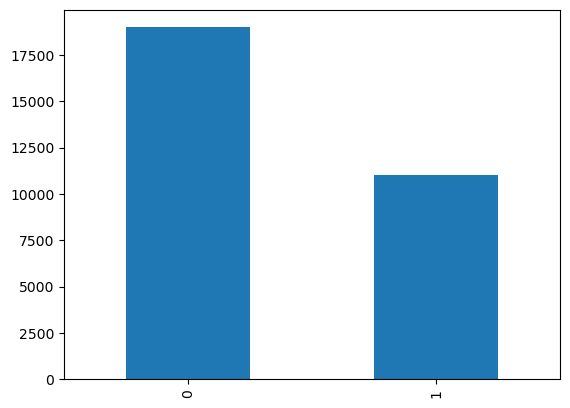

In [15]:
#Distribution of dupllicate and non-duplicate questions
print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [16]:
#Repeated Questions
qid=pd.Series(new_df['qid1'].to_list()+new_df['qid2'].to_list())
print('Number of unique questions',np.unique(qid).shape[0])
x=qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 55245
Number of questions getting repeated 3476


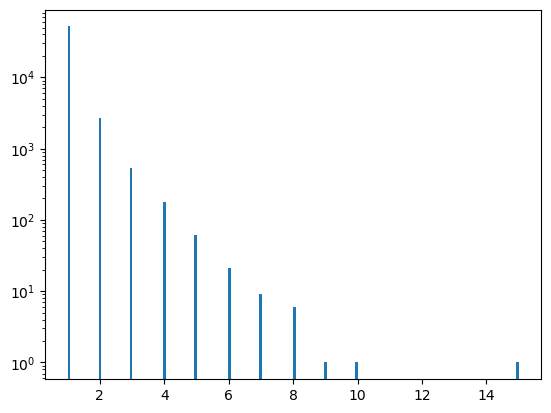

In [17]:
#Repeated questions histogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

# Feature Engineering

In [18]:
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
332859,332859,459865,28248,What is the best free webDAV service?,What is a good website for free books?,0,37,38
112672,112672,53143,18743,What are some of the best places to visit in K...,What are the best places to visit in Kerala fo...,1,72,60
140104,140104,222704,41513,How do you deal with passive aggressive behavior?,What is the best way to deal with a passive ag...,0,49,62
355424,355424,4955,484652,"Which Canon lenses should I buy, a 50mm f/1.8 ...",I already have Tamron 17-50mm f/2.8 IF. Should...,0,62,76
69391,69391,119745,119746,How similar are Soylent and Ensure nutritionally?,Is Soylent a commercial success?,0,49,32


In [19]:
new_df['q1_num_words']=new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words']=new_df['question2'].apply(lambda row: len(row.split(" ")))

In [20]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
332859,332859,459865,28248,What is the best free webDAV service?,What is a good website for free books?,0,37,38,7,8
112672,112672,53143,18743,What are some of the best places to visit in K...,What are the best places to visit in Kerala fo...,1,72,60,17,14
140104,140104,222704,41513,How do you deal with passive aggressive behavior?,What is the best way to deal with a passive ag...,0,49,62,8,12
355424,355424,4955,484652,"Which Canon lenses should I buy, a 50mm f/1.8 ...",I already have Tamron 17-50mm f/2.8 IF. Should...,0,62,76,13,14
69391,69391,119745,119746,How similar are Soylent and Ensure nutritionally?,Is Soylent a commercial success?,0,49,32,7,5


In [21]:
def common_words(row):
    w1=set(map(lambda word : word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word : word.lower().strip(),row['question1'].split(" ")))
    return len(w1 &w2)

In [22]:
new_df['common_words']=new_df.apply(common_words,axis=1)
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words
332859,332859,459865,28248,What is the best free webDAV service?,What is a good website for free books?,0,37,38,7,8,7
112672,112672,53143,18743,What are some of the best places to visit in K...,What are the best places to visit in Kerala fo...,1,72,60,17,14,15
140104,140104,222704,41513,How do you deal with passive aggressive behavior?,What is the best way to deal with a passive ag...,0,49,62,8,12,8
355424,355424,4955,484652,"Which Canon lenses should I buy, a 50mm f/1.8 ...",I already have Tamron 17-50mm f/2.8 IF. Should...,0,62,76,13,14,12
69391,69391,119745,119746,How similar are Soylent and Ensure nutritionally?,Is Soylent a commercial success?,0,49,32,7,5,7
...,...,...,...,...,...,...,...,...,...,...,...
102842,102842,139343,170102,What is neuro linguistic programming?,What is neuro linguistic programming therapy?,0,37,45,5,6,5
388473,388473,343313,88951,Where can I buy custom printed lanyards in Mel...,Where can I get carefully designed promotional...,1,53,69,9,10,9
213004,213004,229341,318203,How can I be good in my studies?,How do I become a good at Studying?,1,32,35,8,8,8
38542,38542,69978,69979,What happens if humans had more developed ridg...,If a human had infinite strength and folded a ...,0,78,92,13,16,13


In [23]:
def total_words(row):
    w1=set(map(lambda word : word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word : word.lower().strip(),row['question1'].split(" ")))
    return( len(w1) +len(w2))
new_df['word_total']=new_df.apply(total_words,axis=1)
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,word_total
332859,332859,459865,28248,What is the best free webDAV service?,What is a good website for free books?,0,37,38,7,8,7,14
112672,112672,53143,18743,What are some of the best places to visit in K...,What are the best places to visit in Kerala fo...,1,72,60,17,14,15,30
140104,140104,222704,41513,How do you deal with passive aggressive behavior?,What is the best way to deal with a passive ag...,0,49,62,8,12,8,16
355424,355424,4955,484652,"Which Canon lenses should I buy, a 50mm f/1.8 ...",I already have Tamron 17-50mm f/2.8 IF. Should...,0,62,76,13,14,12,24
69391,69391,119745,119746,How similar are Soylent and Ensure nutritionally?,Is Soylent a commercial success?,0,49,32,7,5,7,14
...,...,...,...,...,...,...,...,...,...,...,...,...
102842,102842,139343,170102,What is neuro linguistic programming?,What is neuro linguistic programming therapy?,0,37,45,5,6,5,10
388473,388473,343313,88951,Where can I buy custom printed lanyards in Mel...,Where can I get carefully designed promotional...,1,53,69,9,10,9,18
213004,213004,229341,318203,How can I be good in my studies?,How do I become a good at Studying?,1,32,35,8,8,8,16
38542,38542,69978,69979,What happens if humans had more developed ridg...,If a human had infinite strength and folded a ...,0,78,92,13,16,13,26


In [24]:
new_df['word_share']=round(new_df['common_words']/new_df['word_total'],2)
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,word_total,word_share
332859,332859,459865,28248,What is the best free webDAV service?,What is a good website for free books?,0,37,38,7,8,7,14,0.5
112672,112672,53143,18743,What are some of the best places to visit in K...,What are the best places to visit in Kerala fo...,1,72,60,17,14,15,30,0.5
140104,140104,222704,41513,How do you deal with passive aggressive behavior?,What is the best way to deal with a passive ag...,0,49,62,8,12,8,16,0.5
355424,355424,4955,484652,"Which Canon lenses should I buy, a 50mm f/1.8 ...",I already have Tamron 17-50mm f/2.8 IF. Should...,0,62,76,13,14,12,24,0.5
69391,69391,119745,119746,How similar are Soylent and Ensure nutritionally?,Is Soylent a commercial success?,0,49,32,7,5,7,14,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102842,102842,139343,170102,What is neuro linguistic programming?,What is neuro linguistic programming therapy?,0,37,45,5,6,5,10,0.5
388473,388473,343313,88951,Where can I buy custom printed lanyards in Mel...,Where can I get carefully designed promotional...,1,53,69,9,10,9,18,0.5
213004,213004,229341,318203,How can I be good in my studies?,How do I become a good at Studying?,1,32,35,8,8,8,16,0.5
38542,38542,69978,69979,What happens if humans had more developed ridg...,If a human had infinite strength and folded a ...,0,78,92,13,16,13,26,0.5


Minimum characters 2
Maximum characters 391
Average characters 59


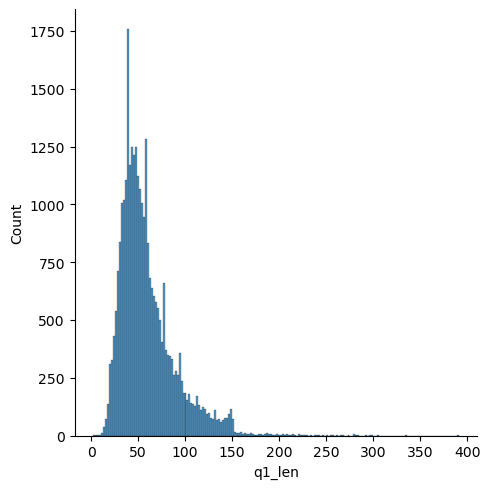

In [25]:
#Analysis of features
sns.displot(new_df['q1_len'])
print('Minimum characters',(new_df['q1_len'].min()))
print('Maximum characters',(new_df['q1_len'].max()))
print('Average characters',int(new_df['q1_len'].mean()))

Minimum characters 2
Maximum characters 1151
Average characters 60


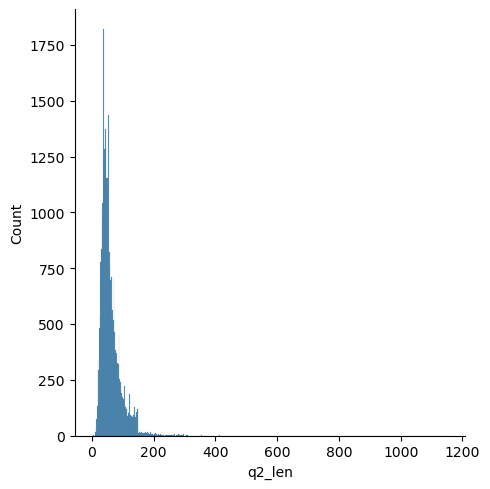

In [26]:
sns.displot(new_df['q2_len'])
print('Minimum characters',(new_df['q2_len'].min()))
print('Maximum characters',(new_df['q2_len'].max()))
print('Average characters',int(new_df['q2_len'].mean()))

Minimum characters 1
Maximum characters 72
Average characters 10


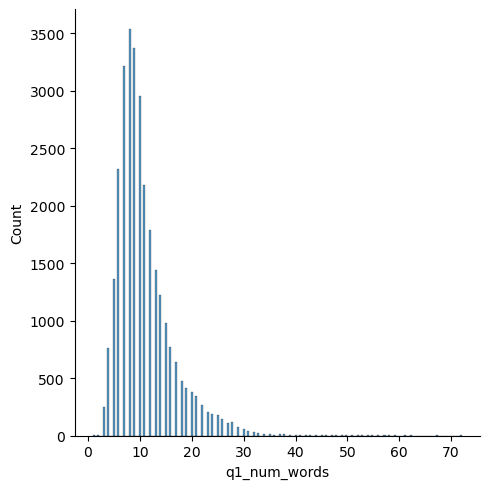

In [27]:
sns.displot(new_df['q1_num_words'])
print('Minimum characters',(new_df['q1_num_words'].min()))
print('Maximum characters',(new_df['q1_num_words'].max()))
print('Average characters',int(new_df['q1_num_words'].mean()))

Minimum characters 1
Maximum characters 237
Average characters 11


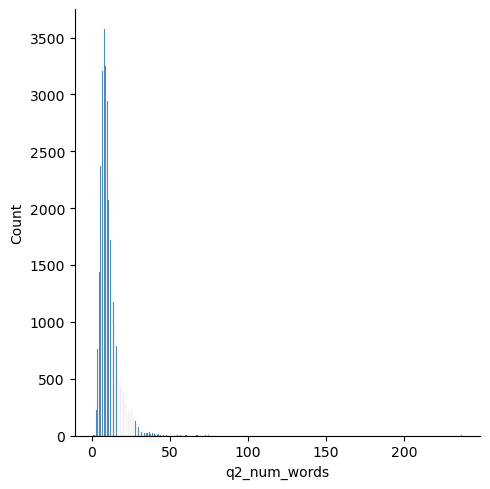

In [28]:
sns.displot(new_df['q2_num_words'])
print('Minimum characters',(new_df['q2_num_words'].min()))
print('Maximum characters',(new_df['q2_num_words'].max()))
print('Average characters',int(new_df['q2_num_words'].mean()))

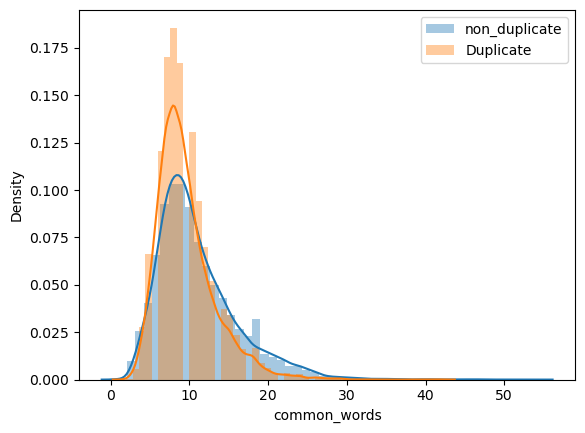

In [29]:
#Common words
sns.distplot(new_df[new_df['is_duplicate']==0]['common_words'],label='non_duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['common_words'],label='Duplicate')
plt.legend()
plt.show()

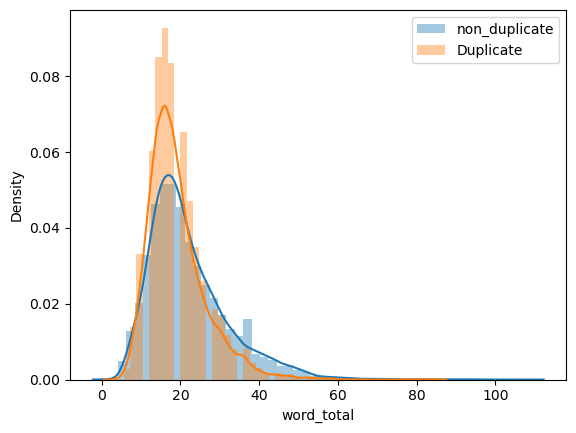

In [30]:
#Total words
sns.distplot(new_df[new_df['is_duplicate']==0]['word_total'],label='non_duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_total'],label='Duplicate')
plt.legend()
plt.show()

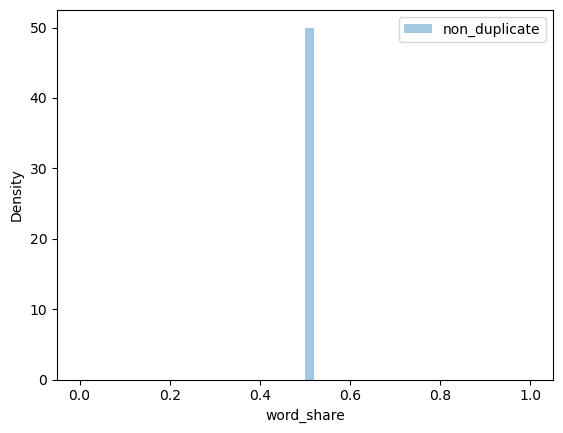

In [31]:
#Word Share
sns.distplot(new_df[new_df['is_duplicate']==0]['word_share'],label='non_duplicate')
#sns.distplot(new_df[new_df['is_duplicate']==1]['word_share'],label='Duplicate')
plt.legend()
plt.show()

In [32]:
ques_df=new_df[['question1','question2']]
ques_df.head()

,question1,question2
332859,What is the best free webDAV service?,What is a good website for free books?
112672,What are some of the best places to visit in K...,What are the best places to visit in Kerala fo...
140104,How do you deal with passive aggressive behavior?,What is the best way to deal with a passive ag...
355424,"Which Canon lenses should I buy, a 50mm f/1.8 ...",I already have Tamron 17-50mm f/2.8 IF. Should...
69391,How similar are Soylent and Ensure nutritionally?,Is Soylent a commercial success?


In [36]:
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])
final_df.shape

(30000, 8)

# Feature Engineering


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
#merge texts
questions=list(ques_df['question1'])+list(ques_df['question2'])

In [43]:
cv=CountVectorizer(max_features=3000)
#q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [60]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
332859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
355424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
388473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
213004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
final_df=pd.concat([final_df,temp_df],axis=1)

In [62]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
332859,0,37,38,7,8,7,14,0.5,0,0,...,0,0,0,0,0,0,0,0,0,0
112672,1,72,60,17,14,15,30,0.5,0,0,...,0,0,0,0,0,0,0,0,0,0
140104,0,49,62,8,12,8,16,0.5,0,0,...,0,0,0,0,0,0,0,0,0,0
355424,0,62,76,13,14,12,24,0.5,0,0,...,0,0,0,0,0,0,0,0,0,0
69391,0,49,32,7,5,7,14,0.5,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=42)

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred0=rf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred0)

0.7405

In [72]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1=xgb.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.7303333333333333